#                   AMAZON REVIEWS USING SENTIMENT ANALYSIS

In [18]:
import gc
gc.collect()

20

In [23]:
import io
import nltk
import pandas as pd
import bz2
import numpy as np
import re
import matplotlib.pyplot as plt
import PIL
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
snow_stemmer = SnowballStemmer(language='english')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from glob import glob
from IPython.display import display,Image
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

In [24]:
def labels_text(x):
  label=[]
  text=[]
  for line in bz2.BZ2File(x):
    decode = line.decode("utf-8")
    label.append(int(decode[9]) - 1)
    text.append(decode[10:].strip())
  return np.array(label),text
train_label, train_text = labels_text('C:\\Users\\prane\\Downloads\\archive\\train.ft.txt.bz2')
test_label, test_text = labels_text('C:\\Users\\prane\\Downloads\\archive\\test.ft.txt.bz2')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\prane\\Downloads\\archive\\train.ft.txt.bz2'

In [19]:
train_text[:10]

NameError: name 'train_text' is not defined

In [4]:
train_label = train_label[:15000]
train_text = train_text[:15000]
test_label = test_label[:15000]
test_text = test_text[:15000]

In [5]:
#################### Testing Code #########################
stop_words=nltk.corpus.stopwords.words('english')
unique_words = []
for i in train_text:
    i = re.sub(r'[^a-zA-Z ]+', ' ', i)
    words = word_tokenize(i)
    words = [snow_stemmer.stem(w.lower()) for w in words if not w.lower() in stop_words]
#     result = [snow_stemmer.stem(w) for w in result]
#     print(result)
    for j in words:
        if j not in unique_words:
            unique_words.append(j)
        else: pass
print(len(unique_words))

25542


In [6]:
words

['great',
 'stori',
 'nice',
 'bind',
 'difficult',
 'translat',
 'hardcov',
 'version',
 'sterl',
 'edit',
 'bound',
 'print',
 'nice',
 'jule',
 'vern',
 'stori',
 'enthral',
 'full',
 'detail',
 'howev',
 'translat',
 'sterl',
 'edit',
 'old',
 'rather',
 'tongu',
 'twist',
 'read',
 'aloud',
 'word',
 'order',
 'sentenc',
 'often',
 'reflect',
 'origin',
 'french',
 'bit',
 'much',
 'likewis',
 'numer',
 'name',
 'various',
 'flora',
 'fauna',
 'render',
 'latin',
 'form',
 'rather',
 'common',
 'name',
 'familiar',
 'found',
 'frederick',
 'paul',
 'walter',
 'newer',
 'also',
 'unabridg',
 'translat',
 'much',
 'easier',
 'read',
 'amaz',
 'journey',
 'journey',
 'center',
 'earth',
 'earth',
 'moon',
 'circl',
 'moon',
 'leagu',
 'sea',
 'around',
 'world',
 'day']

In [25]:
################# TO create  a  train dataframe######################################


stop_words=nltk.corpus.stopwords.words('english')
main_data = []
for i in train_text[:]:
    data = []
    i = re.sub(r'[^a-zA-Z ]+', ' ', i)
    words = word_tokenize(i)
    words = [snow_stemmer.stem(w.lower()) for w in words if not w.lower() in stop_words]
    for i in unique_words:
        if i in words:
            data.append(1)
        else:
            data.append(0)
    main_data.append(data)

In [108]:
#################### Testing Code #########################%%for individual review
def stop_word(text):
    stop_words=nltk.corpus.stopwords.words('english')
    unique_word = []
    for i in text:
        i = re.sub(r'[^a-zA-Z ]+', ' ', i)
        words = word_tokenize(i)
        words = [snow_stemmer.stem(w.lower()) for w in words if not w.lower() in stop_words]
    #     result = [snow_stemmer.stem(w) for w in result]
    #     print(result)
        for j in words:
            if j not in unique_word:
                unique_word.append(j)
            else: pass
    return unique_word
#     print(len(unique_words))

In [109]:
unique_word = stop_word(train_text)

In [114]:
################# TO create  a dataframe######################################%%%%%%% individual reviews ######

def create_dataframe(text,unique_word):
    stop_words=nltk.corpus.stopwords.words('english')
    main_data = []
    for i in text[:]:
        data = []
        i = re.sub(r'[^a-zA-Z ]+', ' ', i)
        words = word_tokenize(i)
        words = [snow_stemmer.stem(w.lower()) for w in words if not w.lower() in stop_words]
        for i in unique_word:
            if i in words:
                data.append(1)
            else:
                data.append(0)
    main_data.append(data)
    dataframe = pd.DataFrame(main_data,columns = unique_word)
    return dataframe

In [115]:
text = "Hey teh product is soo good, It's relliable and perfect for long usage"

In [58]:
main_data = create_dataframe(text,unique_word)

NameError: name 'create_dataframe' is not defined

In [117]:
main_data

,stune,even,non,gamer,sound,track,beauti,paint,seneri,mind,...,califoria,personalitit,nautilus,ommiss,boyish,glee,nemo,voc,scinc,oceanograph
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
model.predict(create_dataframe(text,unique_word))

NameError: name 'lr' is not defined

In [121]:
text = "Very bad product"

In [57]:
datafrae = pd.DataFrame(main_data,columns = unique_word)

NameError: name 'main_data' is not defined

Data Frame

In [4]:
dataframe = pd.DataFrame(main_data,columns = unique_words)

NameError: name 'main_data' is not defined

In [15]:
dataframe['Outcome'] = train_label

In [16]:
dataframe

,stune,even,non,gamer,sound,track,beauti,paint,seneri,mind,...,personalitit,nautilus,ommiss,boyish,glee,nemo,voc,scinc,oceanograph,Outcome
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
14998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [15]:
dataframe.to_parquet('amazondata.parquet')

In [4]:
dataframe = pd.read_parquet('amazondata.parquet')

Random Forest

In [5]:
###############      random forest #################################
R_train,R_test,Z_train,Z_test = train_test_split(dataframe.drop(columns= ['Outcome']),dataframe.Outcome,test_size=0.2)

In [9]:
model = RandomForestClassifier(n_estimators=200,criterion='entropy',max_features='sqrt')
model.fit(R_train,Z_train)
predictions = model.predict(R_test)
print(accuracy_score(Z_test,predictions))

0.848


In [10]:
print("roc_Area Under Curve:")
print(53 * "  ")
print(roc_auc_score(Z_test,predictions))
print(15 * "----")
print(f1_score(Z_test,predictions))

roc_Area Under Curve:
                                                                                                          
0.8505747842002379
------------------------------------------------------------
0.854071661237785


In [13]:
print("training set score : {:.3f}".format(model.score(R_train,Z_train)))
print("testing set score : {:.3f}".format(model.score(R_test,Z_test)))

training set score : 1.000
testing set score : 0.848


In [54]:
estimator = model.estimators_[5]

In [57]:
from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = dataframe.drop(columns = ['Outcome']).columns,
                class_names = dataframe.Outcome,
                rounded = True, 
                precision = 2, filled = True)

TypeError: can only concatenate str (not "numpy.int32") to str

# Logistic Regression

In [13]:
X_train,X_val,y_train,y_val = train_test_split(dataframe.drop(columns= ['Outcome']),dataframe.Outcome,test_size=0.2)

In [19]:
print(roc_auc_score(y_val,lr.predict(X_val)))
print(f1_score(y_val,lr.predict(X_val)))

0.8376197639929155
0.8402755001639882


In [21]:
for c in [0.01,0.05,0.25,0.5,1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train,y_train)
    print("Accuracy for C=%s: %s"%(c,accuracy_score(y_val,lr.predict(X_val))))

Accuracy for C=0.01: 0.8423333333333334
Accuracy for C=0.05: 0.859
Accuracy for C=0.25: 0.8603333333333333
Accuracy for C=0.5: 0.8573333333333333


C:\Users\prane\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=1: 0.855


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,lr.predict(X_val))
cm

KNN neighbour

In [10]:
A_train,A_val,b_train,b_val = train_test_split(dataframe.drop(columns= ['Outcome']),dataframe.Outcome,test_size=0.2)
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance', algorithm='brute')
KNN.fit(A_train,b_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [11]:
prediction = KNN.predict(A_val)
print(accuracy_score(b_val,prediction))

0.5916666666666667


In [51]:
print(roc_auc_score(b_val,prediction))

0.6865549021133728


In [18]:
print("training set score : {:.3f}".format(KNN.score(A_train,b_train)))
print("testing set score : {:.3f}".format(KNN.score(A_val,b_test)))

training set score : 1.000


NameError: name 'A_test' is not defined

In [24]:
from sklearn. feature_extraction. text import CountVectorizer
vectorizer = CountVectorizer()

In [46]:
review = ["the product is not good"]
print(KNN.predict(unique_words.transform([review])))

AttributeError: 'list' object has no attribute 'transform'

SVM

In [16]:
S_train,S_val,m_train,m_val = train_test_split(dataframe.drop(columns= ['Outcome']),dataframe.Outcome,test_size=0.2)
clf = svm.LinearSVC()

In [24]:
clf.fit(S_train,m_train)
predict = clf.predict(S_val)
print(accuracy_score(m_val,predict))

0.826


In [7]:
fpr, tpr, thresholds = roc_curve(Z_test, predictions)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_val, lr.predict(X_val))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(b_val, prediction)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(m_val, predict)
mnb_fpr, mnb_tpr, mnb_thresholds = roc_curve(b_val, predic)

NameError: name 'b_val' is not defined

Text(0, 0.5, 'True Positive Rate')

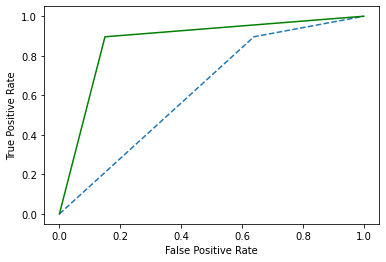

In [21]:
plt.plot(fpr, tpr, linestyle='--',color='red', label= 'Random Forest')
plt.plot(lr_fpr, lr_tpr, linestyle='-',color='green', label= 'Logistic regression')
plt.plot(knn_fpr, knn_tpr, linestyle='-',color='blue', label= 'Knearestneighbour')
plt.plot(svm_fpr, svm_tpr, linestyle='-.',color='orange', label= 'SupportVectorMachine')
plt.plot(mnb_fpr, mnb_tpr, linestyle='-.',color='purple', label= 'MultiNomialBayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

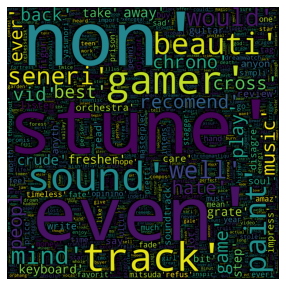

In [53]:
stopwords = set(STOPWORDS)
plt.rcParams['figure.figsize'] = (5,5)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 10000).generate(str(unique_words))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Multinomial Naive bayes

In [50]:
mnb = MultinomialNB(fit_prior=bool)
mnb.fit(A_train,b_train)

MultinomialNB(fit_prior=<class 'bool'>)

In [51]:
predic = mnb.predict(A_val)
print(accuracy_score(b_val,prediction))

MemoryError: Unable to allocate 585. MiB for an array with shape (3000, 25542) and data type float64

In [31]:
print(mnb.predict([[l]])) ############## to get sentiment of particular review##############

NameError: name 'l' is not defined

In [122]:
print("training set score : {:.3f}".format(mnb.score(A_train,b_train)))
print("training set score : {:.3f}".format(mnb.score(A_val,b_val)))

training set score : 0.907


XG Boost

In [87]:
XG = XGBRegressor(n_estimators=50)
XG.fit(A_train,b_train)

XGBoostError: bad allocation

In [ ]:
predictions = XG.predict(A_test)
print(accuracy_score(b_test,predictions))

In [19]:
import matplotlib.pyplot as plt

In [21]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

AttributeError: 'KNeighborsClassifier' object has no attribute 'summary'

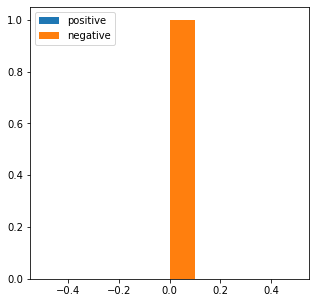

In [97]:
bins = np.linspace(0, 200, 40)
plt.hist([train_label] == 1, label='positive')
plt.hist([train_label] == 1, label='negative')
plt.legend(loc='upper left')
plt.show()

In [ ]:
def save_trees_as_png(clf,iteration,feature_name,target_name):
    file_name = "Positive_" + str(iteration) + ".png"
    dot_data = export_graphviz(
        clf,
        
        
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print("Decision Tree{} saved as png file".format(iteration + 1))

In [ ]:
classifier.estimators_

In [116]:
trai = train_label['1']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices